In [0]:
! pip install keras --upgrade
! pip install tensorflow --upgrade

     |████████████████████████████████| 378kB 42.9MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)


In [0]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import cv2
from PIL import Image
from skimage import color

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'


In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')
#y_onehot = np.load(binary_flder + 'y_onehot.npy')

In [0]:
unique_elements, counts_elements = np.unique(y, return_counts=True)

In [0]:
(list(zip(unique_elements, counts_elements)))

[('AnnualCrop', 3000),
 ('Forest', 3000),
 ('HerbaceousVegetation', 3000),
 ('Highway', 2500),
 ('Industrial', 2500),
 ('Pasture', 2000),
 ('PermanentCrop', 2500),
 ('Residential', 3000),
 ('River', 2500),
 ('SeaLake', 3000)]

One-encoder for Y

In [0]:
# one hot encode

#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#after encoding
label_encoded = le.transform(y)

# one hot encode
y_onehot = to_categorical(label_encoded)

# Split data



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.33, random_state=42, shuffle=True)

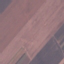

In [0]:
Image.fromarray(X_train[101])

In [0]:
le.inverse_transform([np.argmax(y_train[101])])

array(['AnnualCrop'], dtype='<U20')

In [0]:
X_train.shape

(18090, 64, 64, 3)

In [0]:
X_test.shape

(8910, 64, 64, 3)

In [0]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# ResNet 50

In [0]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras import Sequential
import numpy as np


In [0]:
modelResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3))


94773248/94765736 [==============================] - 1s 0us/step


In [0]:
model = Sequential([modelResNet50,  layers.Flatten(),
                     layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))])
    
# for layer in model2.layers[:-1]:
#     layer.trainable = False
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 23,669,642
Trainable params: 23,616,522
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
sgd= optimizers.SGD(lr=1e-5, momentum=1e-5, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=["accuracy","AUC"])
hist =  model.fit(x=X_train, y=y_train, epochs=25, verbose=1, batch_size=128, validation_data=(X_test,y_test))      


Epoch 1/25
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
142/142 [==============================] - 29s 205ms/step - loss: 3.7560 - accuracy: 0.1154 - auc: 0.5088 - val_loss: 3.5860 - val_accuracy: 0.1164 - val_auc: 0.5125
Epoch 2/25
142/142 [==============================] - 27s 190ms/step - loss: 3.4816 - accuracy: 0.1438 - auc: 0.5418 - val_loss: 3.3414 - val_accuracy: 0.1675 - val_auc: 0.5601
Epoch 3/25
142/142 [==============================] - 27s 190ms/step - loss: 3.2393 - accuracy: 0.1764 - auc: 0.5770 - val_loss: 3.1708 - val_accuracy: 0.1981 - val_auc: 0.5911
Epoch 4/25
142/142 [==============================] - 27s 191ms/step - loss: 3.0285 - accuracy: 0.2059 - auc: 0.6092 - val_loss: 2.9949 - val_accuracy: 0.2222 - val_auc: 0.6205
Epoch 5/25
142/142 [==============================] - 27s 190ms/step - loss: 2.8420 - accuracy: 0.2326 - auc: 0.6403 - val_loss: 2.8291 - val_accuracy: 0.2458 - val_auc: 0.6491
Epoch 6/25
142/142 [==============

In [0]:
scores = model.evaluate(x=X_train, y=y_train, verbose=1)

566/566 [==============================] - 12s 22ms/step - loss: 1.2060 - accuracy: 0.6322 - auc: 0.9172


(0.0, 1.0)

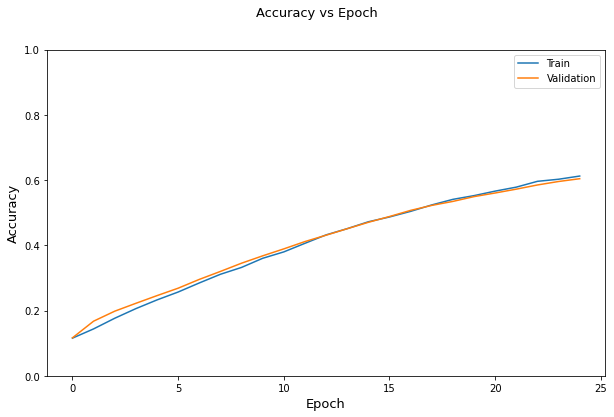

In [0]:
fig = plt .figure(figsize=(10,6))
plt.plot(hist.epoch, hist.history['accuracy'])
plt.plot(hist.epoch, hist.history['val_accuracy'])

fig.suptitle('Accuracy vs Epoch', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
axes = plt.gca()
axes.legend(['Train', 'Validation'])
axes.set_ylim([0, 1])

In [0]:
print('aaaasdf                       asd fafffsadfasdfasdf')  

In [0]:
aaaa  a                       sdfasdfas asdfasdfsad asd asdf asd asdfasdfasdfasdfasdfasdf asdf asd 

In [0]:
aaaa

In [0]:
aaaa